In [2]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Visulaizing data set

In [3]:
import matplotlib.pyplot as plt

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_test.shape

(10000, 32, 32, 3)

In [28]:
single_img=x_train[5]

In [7]:
single_img

array([[[164, 215, 244],
        [162, 212, 240],
        [162, 212, 240],
        ...,
        [157, 210, 237],
        [153, 208, 235],
        [153, 203, 234]],

       [[168, 218, 245],
        [166, 215, 242],
        [166, 215, 242],
        ...,
        [164, 212, 238],
        [160, 209, 236],
        [158, 205, 235]],

       [[172, 220, 246],
        [170, 217, 243],
        [171, 218, 244],
        ...,
        [168, 212, 238],
        [165, 208, 235],
        [163, 207, 236]],

       ...,

       [[123, 160, 105],
        [117, 154, 102],
        [112, 149,  99],
        ...,
        [117, 136, 100],
        [ 95, 115,  79],
        [120, 149, 100]],

       [[120, 156, 100],
        [116, 151,  99],
        [112, 147,  96],
        ...,
        [126, 149, 110],
        [120, 144, 103],
        [120, 152, 101]],

       [[121, 154,  96],
        [120, 152,  99],
        [116, 148,  97],
        ...,
        [124, 152, 108],
        [124, 154, 107],
        [120, 154, 100]]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


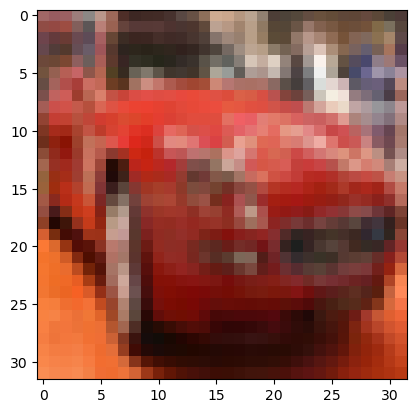

In [29]:
plt.imshow(single_img,cmap='viridis')

In [9]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [10]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [11]:
from tensorflow.keras.utils import to_categorical

In [12]:
y_train.shape

(50000, 1)

In [13]:
y_example=to_categorical(y_train)

In [14]:
y_example[8]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [15]:
y_test.shape

(10000, 1)

In [16]:
y_cat_test=to_categorical(y_test,10)

In [17]:
y_cat_train=to_categorical(y_train,10)

In [18]:
single_img.max()

251

In [19]:
x_train=x_train/251

In [20]:
x_test=x_test/251

In [21]:
x_train.shape

(50000, 32, 32, 3)

In [22]:
x_test.shape

(10000, 32, 32, 3)

In [23]:
x_test

array([[[[0.62948207, 0.44621514, 0.19521912],
         [0.63346614, 0.44223108, 0.187251  ],
         [0.65737052, 0.46215139, 0.20318725],
         ...,
         [0.54581673, 0.37848606, 0.14342629],
         [0.50199203, 0.3625498 , 0.14342629],
         [0.46215139, 0.33864542, 0.1314741 ]],

        [[0.60557769, 0.44621514, 0.20318725],
         [0.60159363, 0.43824701, 0.15936255],
         [0.63346614, 0.45418327, 0.17928287],
         ...,
         [0.54183267, 0.37848606, 0.12350598],
         [0.49800797, 0.3625498 , 0.12749004],
         [0.47410359, 0.35059761, 0.13545817]],

        [[0.60159363, 0.43824701, 0.187251  ],
         [0.60159363, 0.43426295, 0.1314741 ],
         [0.62948207, 0.44223108, 0.14342629],
         ...,
         [0.55378486, 0.39043825, 0.13545817],
         [0.51792829, 0.37848606, 0.13545817],
         [0.47808765, 0.35458167, 0.1314741 ]],

        ...,

        [[0.27091633, 0.4940239 , 0.70517928],
         [0.16733068, 0.39840637, 0.58964143]

In [24]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,BatchNormalization, Dropout
from tensorflow.keras.utils import to_categorical

In [25]:
model = Sequential([
    # Convolutional Layer 1
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    # Convolutional Layer 2
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    # Convolutional Layer 3
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    # Convolutional Layer 4
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    # Flatten the output
    Flatten(),
    
    # Fully Connected Layer
    Dense(512, activation='relu'),
    Dropout(0.5),
    
    # Output Layer
    Dense(10, activation='softmax')  # For CIFAR-10
])

# Display the model summary
model.summary()

C:\Users\mahwi\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 4, 4, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 4, 4, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 920,266 (3.51 MB)

 Trainable params: 919,306 (3.51 MB)

 Non-trainable params: 960 (3.75 KB)

In [26]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# Train the Model"

In [27]:
model.fit(x_train,y_cat_train,epochs=15)


Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 235s 119ms/step - accuracy: 0.4071 - loss: 1.7647
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 165s 106ms/step - accuracy: 0.6196 - loss: 1.0813
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 157s 100ms/step - accuracy: 0.7023 - loss: 0.8675
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 159s 102ms/step - accuracy: 0.7486 - loss: 0.7339
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 171s 110ms/step - accuracy: 0.7795 - loss: 0.6473
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 188s 120ms/step - accuracy: 0.8116 - loss: 0.5505
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 171s 110ms/step - accuracy: 0.8355 - loss: 0.4816
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 175s 112ms/step - accuracy: 0.8621 - loss: 0.4017
Epoch 9/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 175s 112ms/step - accuracy: 0.8801 - loss: 0.3518
Epoch 10/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 186s 119ms/step - accuracy: 0.8932 - loss: 0.3091
Epoch 11/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 174s 111ms/step - accuracy: 0.9064 -

In [30]:
model.evaluate(x_test,y_cat_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.7698 - loss: 1.0184


[1.0319690704345703, 0.76419997215271]

In [37]:
from sklearn.metrics import classification_report
import numpy as np


In [32]:
prediction=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step


In [33]:
prediction

array([[1.8217245e-08, 2.5792815e-07, 1.0762677e-06, ..., 1.6985919e-07,
        5.2221683e-08, 3.4801246e-06],
       [5.8846581e-09, 6.1996798e-05, 4.0354649e-15, ..., 4.7573047e-20,
        9.9993801e-01, 1.9481632e-10],
       [1.8283220e-02, 1.4042254e-05, 3.0630999e-05, ..., 3.0356141e-08,
        9.8137808e-01, 2.7305497e-05],
       ...,
       [2.1555067e-20, 1.9455391e-22, 1.7677136e-15, ..., 1.1861777e-12,
        7.5107464e-22, 2.4475269e-20],
       [1.2249433e-06, 9.9999475e-01, 7.3059927e-09, ..., 1.9630008e-13,
        3.8861590e-06, 5.1694641e-08],
       [2.8472470e-12, 1.2430339e-14, 2.2678183e-10, ..., 9.9920541e-01,
        2.5122347e-13, 2.9005850e-13]], dtype=float32)

In [38]:
prediction[15]

array([4.9040691e-06, 6.6362138e-09, 1.1750172e-10, 1.6286767e-09,
       1.2790075e-08, 5.8298596e-12, 4.1114711e-07, 5.4743202e-15,
       9.9999475e-01, 5.0242976e-10], dtype=float32)

In [39]:
predicted_classes=np.argmax(prediction,axis=1)

In [40]:
predicted_classes
report=classification_report(y_test, predicted_classes)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.76      0.80      1000
           1       0.91      0.88      0.89      1000
           2       0.63      0.70      0.67      1000
           3       0.63      0.54      0.58      1000
           4       0.73      0.69      0.71      1000
           5       0.69      0.66      0.67      1000
           6       0.71      0.89      0.79      1000
           7       0.84      0.76      0.80      1000
           8       0.85      0.90      0.87      1000
           9       0.85      0.86      0.85      1000

    accuracy                           0.76     10000
   macro avg       0.77      0.76      0.76     10000
weighted avg       0.77      0.76      0.76     10000

